### OPTIMAL SKILLS

In [1]:
import ast
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\91706\Data Analytics Practice\databases\python\Job_Data_Analysis.csv")

In [3]:
#Data Cleaning
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_DA=df[df['job_title_short'] == 'Data Analyst'].copy()

In [6]:
df_DA=df_DA.dropna(subset=['salary_year_avg'])
df_DA_exploded=df_DA.explode('job_skills')
df_DA_exploded[['salary_year_avg' , 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [12]:
df_DA_skills=df_DA_exploded.groupby('job_skills')['salary_year_avg'].agg(['count','median']).sort_values(by='count',ascending=False)
df_DA_skills=df_DA_skills.rename(columns={'count':'skill_count','median':'median_salary'})
DA_job_count = len(df_DA)
df_DA_skills['skill_percent'] = df_DA_skills['skill_count']/DA_job_count * 100
skill_percent = 5
df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_percent]
df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,3079,92500.0,56.485049
excel,2135,84479.0,39.167125
python,1838,98500.0,33.718584
tableau,1657,95000.0,30.398092
r,1073,92527.5,19.684462
power bi,1042,90000.0,19.115759
sas,1006,90000.0,18.455329
word,523,80000.0,9.594570
powerpoint,518,85000.0,9.502844


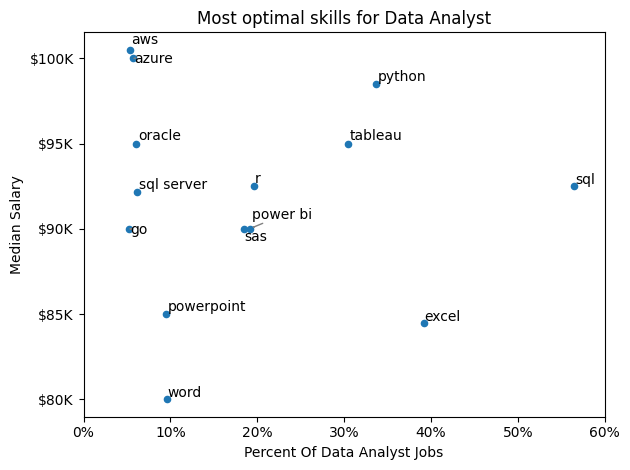

In [25]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')

text=[]
for i,txt in enumerate(df_DA_skills_high_demand.index):
    text.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))
                         
adjust_text(text,arrowprops=dict(arrowstyle='->',color='gray'))

plt.xlabel('Percent Of Data Analyst Jobs')
plt.ylabel('Median Salary')
plt.title('Most optimal skills for Data Analyst')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlim(0,60)
plt.tight_layout()
plt.show()

In [29]:
df_technology=df['job_type_skills'].copy()

df_technology=df_technology.drop_duplicates()
df_technology=df_technology.dropna()

technology_dict={}
for row in df_technology:
    row_dict=ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] +=value
        else:
            technology_dict[key] = value

for key,value in technology_dict.items():
    technology_dict[key]=list(set(value))

df_technology= pd.DataFrame(list(technology_dict.items()), columns=['technology','skills'])
df_technology = df_technology.explode('skills')
df_technology

,technology,skills
0,analyst_tools,spss
0,analyst_tools,power bi
0,analyst_tools,esquisse
0,analyst_tools,nuix
0,analyst_tools,outlook
...,...,...
9,sync,webex
9,sync,mattermost
9,sync,microsoft teams
9,sync,zoom


In [32]:
df_plot=df_DA_skills_high_demand.merge(df_technology,left_on='job_skills',right_on='skills')
df_plot

,skill_count,median_salary,skill_percent,technology,skills
0,3079,92500.0,56.485049,programming,sql
1,2135,84479.0,39.167125,analyst_tools,excel
2,1838,98500.0,33.718584,programming,python
3,1657,95000.0,30.398092,analyst_tools,tableau
4,1073,92527.5,19.684462,programming,r
5,1042,90000.0,19.115759,analyst_tools,power bi
6,1006,90000.0,18.455329,analyst_tools,sas
7,1006,90000.0,18.455329,programming,sas
8,523,80000.0,9.594570,analyst_tools,word
9,518,85000.0,9.502844,analyst_tools,powerpoint


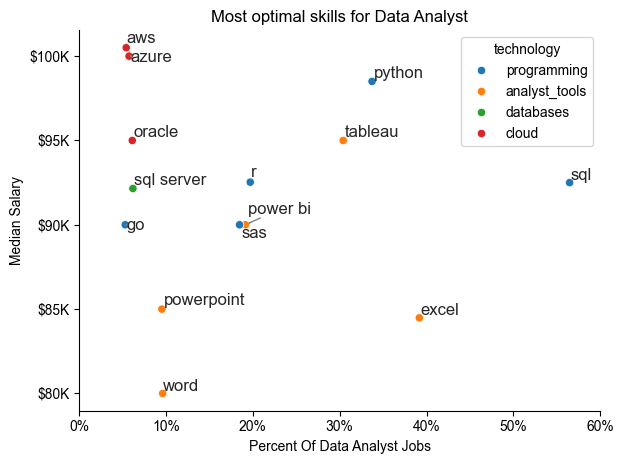

In [34]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

#df_DA_skills_high_demand.plot(kind='scatter',x='skill_percent',y='median_salary')
sns.scatterplot(
    data=df_plot,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.set_theme(style='ticks')
sns.despine()

text=[]
for i,txt in enumerate(df_DA_skills_high_demand.index):
    text.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i],df_DA_skills_high_demand['median_salary'].iloc[i],txt))
                         
adjust_text(text,arrowprops=dict(arrowstyle='->',color='gray'))

plt.xlabel('Percent Of Data Analyst Jobs')
plt.ylabel('Median Salary')
plt.title('Most optimal skills for Data Analyst')
ax=plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

plt.xlim(0,60)
plt.tight_layout()
plt.show()